In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Restaurant_Reviews.tsv'
df = pd.read_csv(path,delimiter='\t',quoting=3)
df.head()

FileNotFoundError: ignored

Data preprocessing

In [ ]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

shape of data set


In [ ]:
df.shape

(1000, 2)

In [ ]:
corpus = []

In [ ]:
import nltk
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import joblib
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<Axes: ylabel='count'>

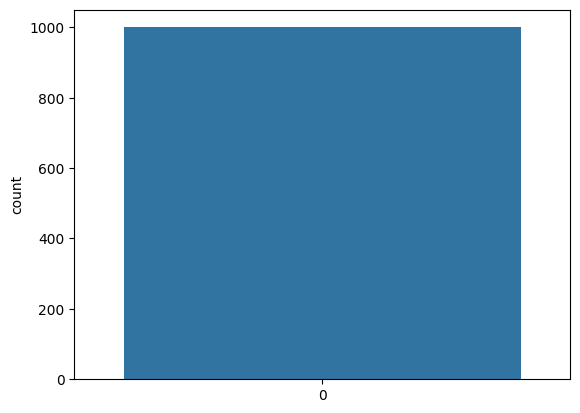

In [ ]:
import seaborn as sns
sns.countplot(df['Liked'])

In [ ]:
df['Review'][1]

'Crust is not good.'

In [ ]:
for i in range(0, 1000):
    # Removing the special character from the reviews and replacing it with space character
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])

    # Converting the review into lower case character
    review = review.lower()

    # Tokenizing the review by words
    review_words = review.split()

    # Removing the stop words using nltk stopwords
    review_words = [word for word in review_words if not word in set(
        stopwords.words('english'))]

    # Stemming the words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    # Joining the stemmed words
    review = ' '.join(review)

    # Creating a corpus
    corpus.append(review)



In [ ]:
review

'wast enough life pour salt wound draw time took bring check'

In [ ]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
# Creating Bag of Words model
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [ ]:
# Creating a pickle file for the CountVectorizer model
joblib.dump(cv, "cv.pkl")

['cv.pkl']

In [ ]:
# Model Building
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

models 1. nav bays classifier


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

<Axes: >

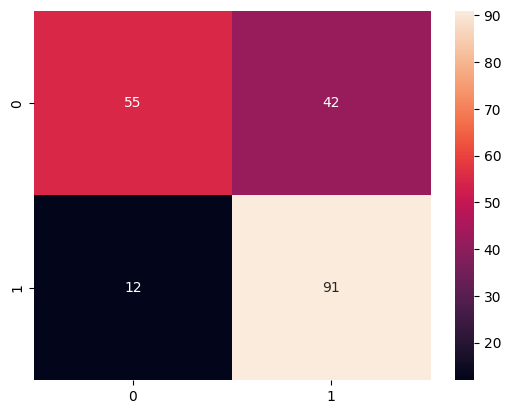

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
accuracy_score(y_test,y_pred)

0.73

In [ ]:
# Fitting Naive Bayes to the Training set
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.2)

In [ ]:
y_pred = classifier.predict(X_test)

<Axes: >

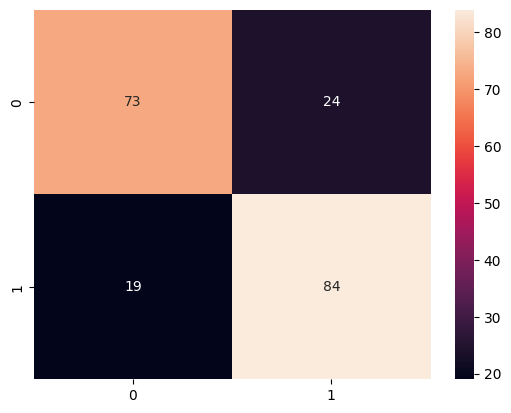

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
accuracy_score(y_test,y_pred)

0.785

In [ ]:
x_pred = np.array(['The food was delicious'])
x_pred = vectorizer.transform(x_pred).toarray()
classifier.predict(x_pred)

NameError: ignored

In [ ]:

# Creating a pickle file for the Multinomial Naive Bayes model
joblib.dump(classifier, "model.pkl")


['model.pkl']